# 2. Get the data

In this example, our data is already all in one CSV file, accessible on the Internet. We could go to the indicated URL with our browser, download the data, and uncompress it ourselves. But, we can also do that with Python code. 

The function defined below downloads the data for this example from the Web, uncompresses it, and stores it in the same directory as this notebook. 

In [57]:
# see page 44

import os
import tarfile
from six.moves import urllib

# constants for the data's main URL, download location, and specific file URL
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = '.'
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

'''
' function to get the housing data
'''
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    # if the download destination folder doesn't exist, make it
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        
    # create full download path
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    
    # download the data
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # decompress the data
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
# call the function to download the data
fetch_housing_data()


Now that we have the data, we can put it into a Pandas dataframe. The cell below creates a function for doing that. 

(Note: neither the download nor the loading into a dataframe *require* the use of a function. But, if these are tasks we might do frequently, or we might have to do in other programs, putting the code in functions (and then in a separate file) would make our lives easier.)

In [58]:
# see page 44

import pandas as pd

'''
' function to load housing data into a Pandas dataframe (assumes the prior code cell was executed)
'''
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

# load the data, and take a look at the first few rows
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



We can get metadata about a Pandas dataframe by calling its `info()` method. We can find the shape, column types, number of non-null entries in each column, etc. For the housing data, which column(s) might be a problem for us as we proceed?


In [59]:
# see page 45

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



The `ocean_proximity` field has categorical entries, rather than numbers, so let's get a sense of what categories there are, and how many of each exist in the dataframe. We can do this by selecting the column and calling the `value_counts()` method. 


In [60]:
# see page 46

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


Likewise, we can examine the characteristics of the numerical columns of the dataframe by calling the `describe()` method. This will only perform statistics using the non-null values.


In [61]:
# see page 46

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



We can also gain some insight into the data by looking at histograms of the different features. Calling the `hist()` method from a dataframe does this.


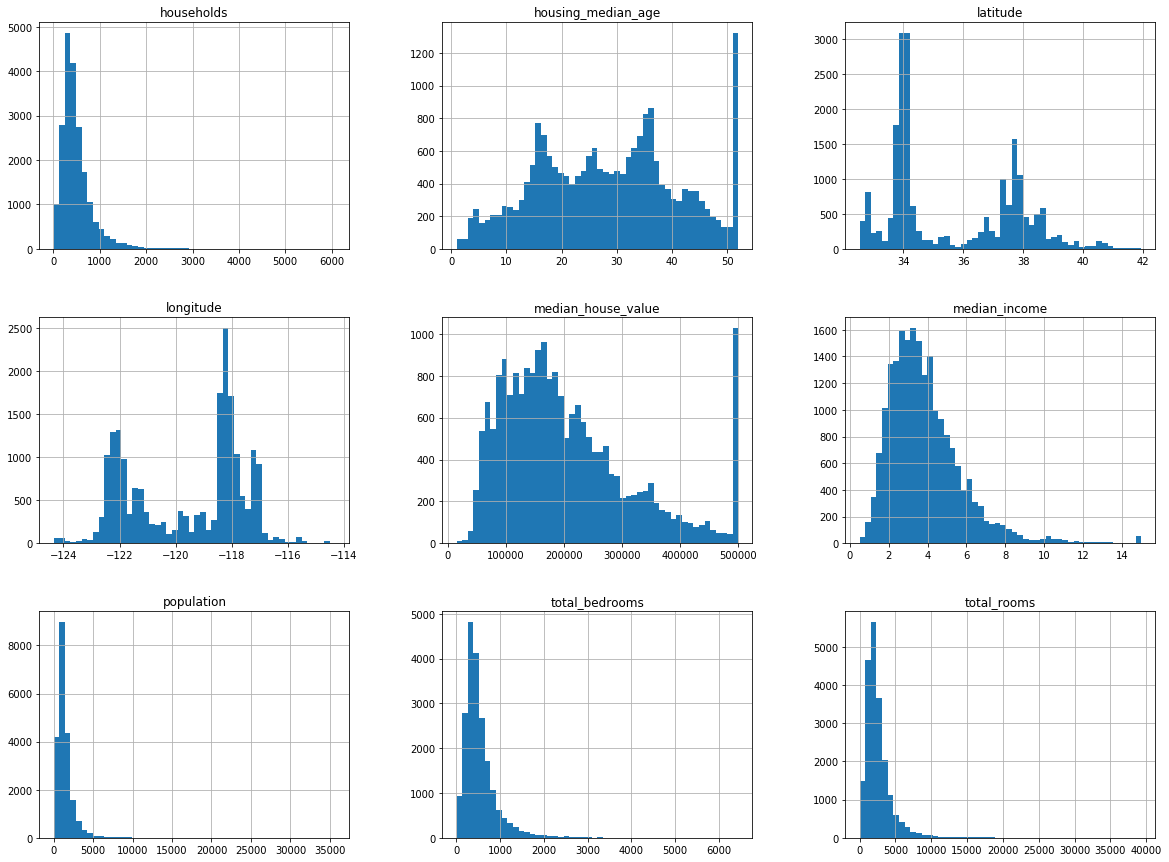

In [62]:
# see page 47

# magic words to display plots in Jupyter notebook
%matplotlib inline  

import matplotlib.pyplot as plt

# create the histograms
housing.hist(bins=50, figsize=(20, 15))
plt.show()

## Create a test set (and don't look at it)

Our brains are great at pattern recognition, but also tend to overfit. So, if we look at the data we will test our model on *too* closely, we may form unconcious biases that lead us to choose an inappropriate model or introduce other errors. The book calls this *data snooping bias*. 

To prevent that, before we go further, let's set aside about 20% of the data to use as our test set. See pages 49 - 53 of the text for a discussion of several ways we might do this. 

The following code will set aside a testing set that makes sure to include data from all of the median income categories.

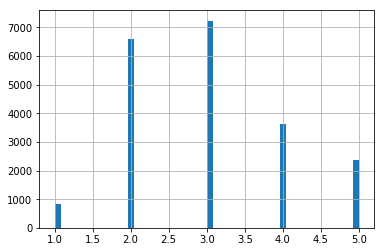

In [63]:
# see page 51

import numpy as np

# first, create a categorized median income column in the dataframe
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

# look at the categories via a histogram
housing['income_cat'].hist(bins=50)
plt.show()

In [64]:
# see page 52

# now, use a scikit-learn function to split the data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=68333)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [65]:
# see page 52

# see what proportion of the test data rows is in each income category
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [66]:
# see page 52

# compare to the full data set to see if our test set seems representative
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [67]:
# see page 53

# lastly, get rid of the income_cat field so our data is back to original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# 3. Discover and visualize the data to gain insights

Now that we've set aside our test data, we can look at the training data to see if we can gain insight that will help us choose an appropriate model. 


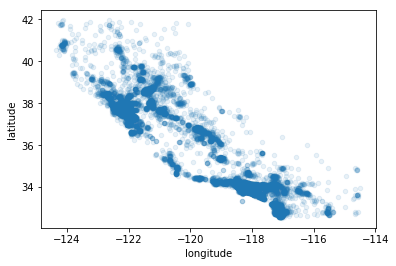

In [68]:
# see page 53

# make a copy of the training set that we can examine
housing = strat_train_set.copy()

# scatter plot the lat / long features, with transparency set low so that higher
# population density will be apparent
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

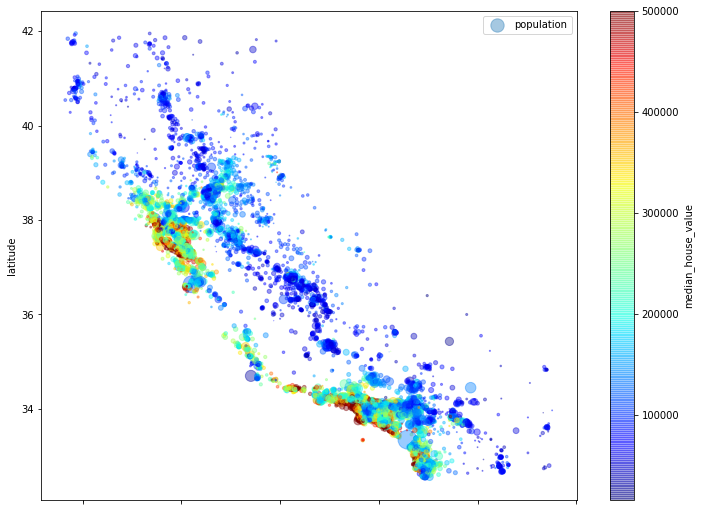

In [69]:
# see page 55

# likewise, but now color code with larger circles = larger populations,
# and price represented by color (blue = low, red = high)
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population',
            c='median_house_value',
            cmap=plt.get_cmap('jet'),
            colorbar=True,
            figsize=(12,9))
plt.legend()
plt.show()


This plot seems to tell us that the closer to the ocean you are, and the closer to a high population area you are, the higher the cost of a house will be. But, this isn't universally true -- notice that Northern California property close to the ocean isn't very highly priced. 

If a dataset isn't too large, we can look at the standard correlation coefficient between pairs of attributes, using the dataframe's `corr()` function. The next cell uses this to look at the correlation between the median house value and the other attributes.


In [70]:
# see page 56

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688241
total_rooms           0.137380
housing_median_age    0.111673
households            0.068003
total_bedrooms        0.052854
population           -0.025784
longitude            -0.053427
latitude             -0.138013
Name: median_house_value, dtype: float64


Values close to 1 indicate strong positive correlation. In this case, there is a correlation between median income and median house value -- housing costs more in areas where the income is higher. Values close to -1 indicate strong negative correlation. Here, we see a small negative correlation between latitude and median house value -- housing tends to cost less the further north we go. Values close to zero indicate no linear correlation. 

We can also look for correlations visually, using the `scatter_matrix()` function, as shown in the next cell.


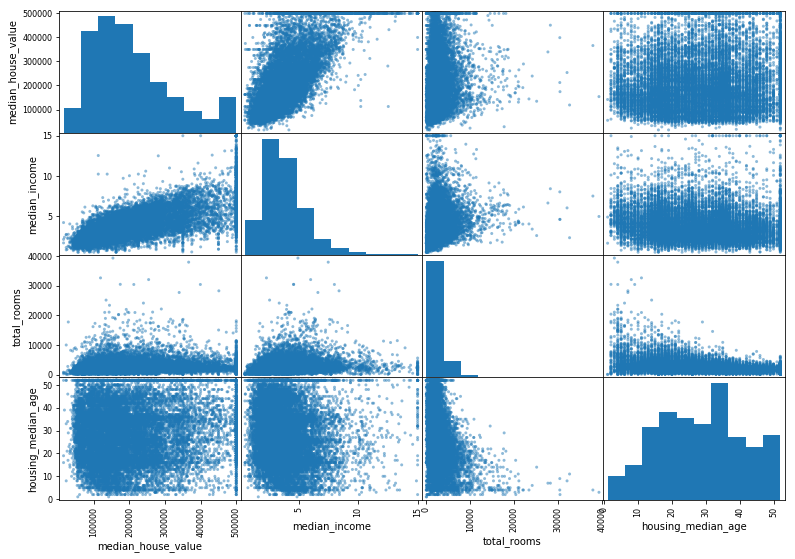

In [71]:
# see page 57

from pandas.plotting import scatter_matrix

# only look at four attributes, rather than all 11
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

# create the plots
scatter_matrix(housing[attributes], figsize=(13,9))
plt.show()


The plots on the upper-left to lower-right diagonal are shown as histograms rather that scatters, because a scatter of one attribute against itself would not be very interesting.

Of the attributes we compared, the median income does seem to be the best predictor of the median house value. The next cell examines that scatter plot more closely.


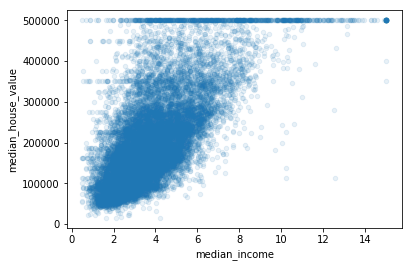

In [72]:
# see page 58

housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()


In this data set, the median house value field has been capped at $500,000, which is apparent in the plot. Whether this matters would depend on the requirements of the downstream system our model will feed. In this chapter, we will assume it does not matter.

There are a couple of ways we can improve our data before proceeding. The data includes the *total* number of rooms in each district, and the *total* number of bedrooms in each district. Let's compute the number of rooms and bedrooms per household instead, and see if those seem to be correlated to median house value. We will also calculate the number of people in each household.


In [73]:
# see page 59

# create the new attributes
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

# examine the new correlation matrix
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688241
rooms_per_household         0.163085
total_rooms                 0.137380
housing_median_age          0.111673
households                  0.068003
total_bedrooms              0.052854
population_per_household   -0.022983
population                 -0.025784
longitude                  -0.053427
latitude                   -0.138013
bedrooms_per_room          -0.259234
Name: median_house_value, dtype: float64


We can see that the `bedrooms_per_room` attribute we added is more correlated than the total number of rooms or bedrooms -- houses with a lower bedroom to room ratio tend to be more expensive. Also, the `rooms_per_household` is a better predictor than just the total number of rooms -- houses with more rooms are more expensive.

# 4. Prepare the data for ML algorithms

There are several things we have to take care of before using the data: 

* We need to do something about the `total_bedrooms` field, because some rows have no data here.

* We need to do something about the `ocean_proximity` field, which is a text category field, rather than numeric. 

* We need to perform *feature scaling*, so that the range of values for each of our features is similar (as it is, some features range up to nearly 40,000, while the median income feature is between 0 and 15.

The text, on pages 60 - 69, covers how to do the following data cleaning operations individually, and then in *pipelines*. A pipeline is a way of encapsulating a series of operations on data so that the series can easily be applied again (say, when we have new data). Here, we will just show the pipelined version, discussing each of the operations that we're using in turn.

In [74]:
# see pages 60 - 69

# return to original data, and separate predictors from labels
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# indices for several columns used below
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

'''
 * Custom transformer for adding the rooms_per_household, population_per_household,
 * and bedrooms_per_room features. Go back to the chapter slides for some insight 
 * on classes in Python. 
'''
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    '''
     * Constructor. Second parameter says we do want the bedrooms_per_room
     * feature; it defaults to True.
    '''
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    '''
     * This isn't a model, but a transformer of data, so the fit() method
     * does nothing.
    '''
    def fit(self, X, y = None):
        return self
    
    '''
     * The transform method adds our two or three new features. 
    '''
    def transform(self, X, y = None):
        # do the two extra features that are always computed
        # Note: X is a NumPy array. 
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        # check parameter value to see if we are also adding bedrooms_per_room
        if self.add_bedrooms_per_room:
            # if so, calculate the feature
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            
            # then add the three features. NumPy c_ function concatenates the extra
            # features to the original data
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            # if no 3rd feature, just add the two extra features
            return np.c_[X, rooms_per_household, population_per_household]
     
'''
 * This class is a transformer that selects only certain attributes (columns), which
 * are passed in as a parameter to the constructor. 
'''
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values
    

# Create a copy of the housing data without the ocean_proximity field
housing_num = housing.drop('ocean_proximity', axis=1)

# Get a list of just the column labels of the numeric data
num_attribs = list(housing_num)
# Get a list of the non-numeric data -- just ocean_proximity
cat_attribs = ['ocean_proximity']

# Create a pipeline of the numeric transformations to perform. It does this:
# 1. selects just the numeric columns
# 2. fills in missing data by using the mean of the existing feature values
# 3. calculates the three extra features we looked at before
# 4. scales the features values to be all in similar ranges
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])        

# Create a pipeline for transforming the non-numeric attribute. It does this:
# 1. selects just the non-numeric column
# 2. uses one-hot encoding to transform the ocean_proximity field to a sparse binary vector
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder()),
])

# the full transformation pipeline does the numeric and then the non-numeric
# pipelines
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

# execute the pipeline and view the results
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)
housing_prepared.toarray()

(16512, 16)


array([[-1.15892186,  0.78547869,  1.3740364 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.24758108, -1.4168518 , -0.37412909, ...,  0.        ,
         0.        ,  1.        ],
       [-1.08418574,  0.78547869, -1.3276739 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.3272996 , -0.79363913,  0.42049159, ...,  0.        ,
         0.        ,  0.        ],
       [-1.04930889,  1.10879955, -0.53305323, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86994221,  1.38994813,  0.49995366, ...,  0.        ,
         0.        ,  0.        ]])

# 5. Select / train a model

Here we will train a linear regression model, as we did in chapter one. 

In [75]:
# see page 69

from sklearn.linear_model import LinearRegression

# create and train the model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# how good is it? look at the predictions versus the labels for a 
# few values (1st 5 rows)
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

list_predictions = lin_reg.predict(some_data_prepared)
list_labels = list(some_labels)

for (p, l) in zip(list_predictions, list_labels):
    print("%.2f\t%.2f" % (p, l))

311133.42	331600.00
153662.38	107300.00
309141.07	362700.00
203722.82	73400.00
175918.04	110400.00



This doesn't look that great, but let's quantify how good the model is, for all our predictions, using the RMSE measure.

In [76]:
# see page 70

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68281.83994900352


So, our prediction error overall is almost 70,000! That's not that good, especially since most districts have median housing values ranging from 120,000 to 265,000. Let's try another model, a `DecisitionTreeRegressor` -- a different type of model, covered in chapter six. 

In [77]:
# see page 70

from sklearn.tree import DecisionTreeRegressor

# create and train the model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

# make predicitons
housing_predictions = tree_reg.predict(housing_prepared)

# how good is it?
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0


That is very suspicious! It is very, very unlikely that our model is perfect. The more likely scenario is that our model is overfitting the data. 

We *do not* want to try the model on the test data yet, so we need another way of seeing if we have overfitting. The `cross_val_score` function will do cross validation, by automatically splitting our training data into separate sets, and train and evaluate the model on each subset. 


In [78]:
# see page 71

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
    
display_scores(tree_rmse_scores)

Scores: [69754.38131754 72339.69079677 70572.16419793 68587.36566024
 69683.52583749 66101.9135463  69557.98500656 68695.364333
 71260.76809641 71142.41342244]
Mean: 69769.55722146672
Standard deviation: 1655.707717620721


In [79]:
# see page 72

# perform cross validation on the linear regression model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [68838.37536711 69892.04489511 67266.98637897 67493.65490527
 67316.09200298 66474.32429016 69803.20573042 72431.7797143
 67004.01065728 69477.99511268]
Mean: 68599.84690542672
Standard deviation: 1741.905323247444


In [80]:
# see page 72

# this one will take a while!
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

C:\Users\mark.meysenburg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


22031.67547427695
Scores: [50955.4160493  54689.36414985 53942.39292666 51346.49235394
 51881.00787354 51094.78532217 53886.28966622 52756.11322702
 52661.55095727 52951.65080638]
Mean: 52616.506333236815
Standard deviation: 1225.9549208200003


# 6. Fine tune  the model

We would try to create a short list of models that seem to work well in the previous step. Once we have that short list, we can twiddle each model's *hyperparameters* to see if we can improve their operation. Hyperparameters control certain aspects of the particular learning algorithm, rather than specific data values we pass in. There are different hyperparameters for each algorithm, and there may be several of them. So, it will be tiresome to try to test variations of all the hyperparameters manually. Luckily, there is a tool in Scikit-Learn, `GridSearchCV`, that will automate the process for us. We can give this tool our model, the list of hyperparameters we want to change, and the values to try; then `GridSearchCV` takes over and tries everything out. 

The next section shows how we can apply this to the random forest regressor we created above.


In [81]:
# see page 73

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [82]:
# see page 74

grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [83]:
# see page 74

grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [84]:
# see page 74

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63901.04409615962 {'max_features': 2, 'n_estimators': 3}
55263.0141689391 {'max_features': 2, 'n_estimators': 10}
52808.77761346067 {'max_features': 2, 'n_estimators': 30}
60421.77300477845 {'max_features': 4, 'n_estimators': 3}
52751.66828659018 {'max_features': 4, 'n_estimators': 10}
50163.543005851665 {'max_features': 4, 'n_estimators': 30}
58658.00132210081 {'max_features': 6, 'n_estimators': 3}
51897.00100679782 {'max_features': 6, 'n_estimators': 10}
49590.29247242074 {'max_features': 6, 'n_estimators': 30}
58733.84277584557 {'max_features': 8, 'n_estimators': 3}
51933.38067421763 {'max_features': 8, 'n_estimators': 10}
50002.86126754293 {'max_features': 8, 'n_estimators': 30}
62066.82521470527 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54164.46948618533 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60006.937848169495 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52148.142625842745 {'bootstrap': False, 'max_features': 3, 'n_estimators': 


There are some other ways to tweak the model(s), discussed on pages 75 and 76. Eventually, once we have settled on a model and found the best hyperparameters for it, we can *finally* see how it does on the test data. The code in the cell below does this, for the best model found in the grid search above.


In [85]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

49574.641145765556
